In [16]:
import plotly.graph_objs as pgo
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly

import networkx as nx

In [139]:
# FUNCTIONS

'''
Generates 3D node coordinates.
Returns a trace of nodes. 
'''
def get_trace_nodes_3D(posG, info_list, color_list, size, opac):

    key_list=list(posG.keys())
    trace = pgo.Scatter3d(x=[posG[key_list[i]][0] for i in range(len(key_list))],
                           y=[posG[key_list[i]][1] for i in range(len(key_list))],
                           z=[posG[key_list[i]][2] for i in range(len(key_list))],
                           mode = 'markers+text', 
                           text = info_list,
                           hoverinfo = 'text',
                           #textposition='middle center',
                           marker = dict(
                color = color_list,
                size = size,
                symbol = 'circle',
                line = dict(width = 1.0,
                        color = color_list)
            ),opacity = opac
        )
    
    return trace

'''
Generates edges from 3D coordinates.
Returns a trace of edges.
'''
def get_trace_edges_3D(G, posG, color_list, opac = 0.2):
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in G.edges():
        x0, y0, z0 = posG[edge[0]]
        x1, y1, z1 = posG[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
        edge_z.append(z0)
        edge_z.append(z1)
        edge_z.append(None)

    trace_edges = pgo.Scatter3d(
                        x = edge_x, 
                        y = edge_y, 
                        z = edge_z,
                        mode = 'lines', hoverinfo='none',
                        line = dict(width = 0.5, color = color_list),
                        opacity = opac
                )
    
    return trace_edges


'''
Generates 2D node coordinates.
Returns a trace of nodes.
'''
def get_trace_nodes_2D(posG, info_list, color_list, size, opac):

    key_list=list(posG.keys())
    trace = pgo.Scatter(x=[posG[key_list[i]][0] for i in range(len(key_list))],
                           y=[posG[key_list[i]][1] for i in range(len(key_list))],
                           mode = 'markers+text',
                           text = info_list,
                           hoverinfo = 'text',
                           textposition='top left',
                           marker = dict(
                color = color_list,
                size = size,
                symbol = 'circle',
                line = dict(width = 1.0,
                        color = color_list)
            ),opacity = opac
        )
    
    return trace


'''
Generates edges from 2D coordinates.
Returns a trace of edges.
'''
def get_trace_edges_2D(G, posG, color_list, opac = 0.2):
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = posG[edge[0]]
        x1, y1 = posG[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
 
    trace_edges = pgo.Scatter(
                        x = edge_x, 
                        y = edge_y, 
                        mode = 'lines', hoverinfo='none',
                        line = dict(width = 0.2, color = color_list),
                        opacity = opac
                )
    
    return trace_edges


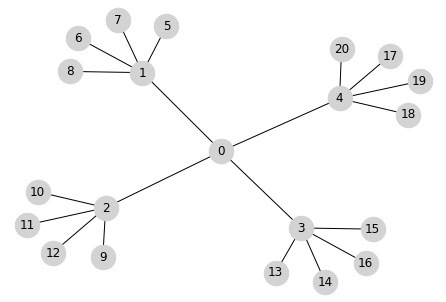

In [73]:
# toy network as example 

organism = 'tree'
n = 21 # number of nodes
r = 4 # branching factor
G = nx.full_rary_tree(r, n)
nx.draw(G, node_color ='lightgrey', node_size=600.0, with_labels=True)

In [74]:
print('Network:', organism)
print('Number of nodes: %s' %len(list(G.nodes())))
print('Number of edges: %s' %len(list(G.edges())))
print('Network density: %.1f%%' %(200.*len(list(G.edges()))/(len(list(G.nodes()))*len(list(G.nodes()))-1)))

Network: tree
Number of nodes: 21
Number of edges: 20
Network density: 9.1%


### Visual presettings

In [130]:
# General Parameters:


# Edges
edge_width = 2
edge_col = 'lightgrey'
edge_colordark = 'dimgrey'
opacity_edges = 0.5

# Nodes
opacity_nodes = 0.3
node_edge_col = None

size = 1.0
size3d = 3.0

colours = 'blue'

# hover info
info_list = list(range(0,len(G.nodes()))) # here could be a list with node information (to be seen when hovering over a node)

labels = dict(zip(G.nodes(),info_list))

### Spring 2D - with networkx

In [131]:
%%time

posG_spring2D = nx.spring_layout(G, iterations = 150, dim = 2)

CPU times: user 24.1 ms, sys: 3 ms, total: 27.1 ms
Wall time: 24.6 ms


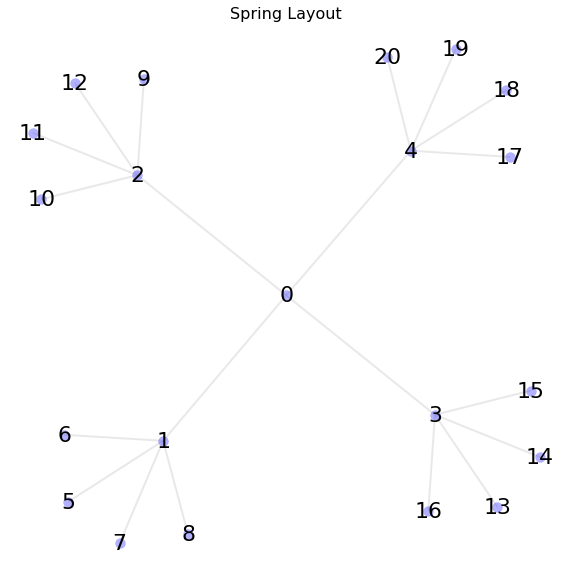

In [134]:
plt.figure(figsize=(10,10))
plt.title('Spring Layout', size= 16)

nx.draw_networkx_nodes(G, posG_spring2D, edgecolors = node_edge_col, linewidths = 0.25, node_color = colours, 
                       node_size= 100, #size, 
                       alpha = opacity_nodes
                      )
nx.draw_networkx_edges(G, posG_spring2D, width = edge_width, edge_color = edge_col, alpha = opacity_edges)
nx.draw_networkx_labels(G,posG_spring2D,labels,font_size=22)


plt.box(False)

#plt.savefig('2Dspring_'+organism+'.png')

plt.show()

In [133]:
spring2D_nodes = get_trace_nodes_2D(posG_spring2D, info_list, colours, size = 10.0, opac= 0.2)
spring2D_edges = get_trace_edges_2D(G, posG_spring2D, colours, opac = 0.2)

spring2D_data = [spring2D_nodes, spring2D_edges]

print('Spring Layout:', organism)

fig = pgo.Figure()
for i in spring2D_data:
    fig.add_trace(i)
    
# text in 2D field: 
annotations2D = [dict(
                x=[1], # x position for text 
                y=[1], # y position for text 
                showarrow=False,
                text= 'some text here',
                xanchor="right",
                ay=-100,
                ax=-100,
                opacity=0.8,
                arrowhead=0,
                arrowwidth=0.5,
                )]

# PLOT 
# uncomment for dark plot 
'''fig.update_layout(template='plotly_dark', showlegend=False, width=1200, height=1200,
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      yaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      zaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                    dragmode="turntable",
                    #annotations=annotations,
                ))'''

fig.update_layout(template='plotly_white', showlegend=False, width=1200, height=1200,
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,tickfont=dict(
                            color='white')),
                      yaxis=dict(nticks=0,tickfont=dict(
                            color='white')),
                      zaxis=dict(nticks=0,tickfont=dict(
                            color='white')),    
                    annotations=annotations2D,
                ))    

plotly.offline.plot(fig, filename = '2DSpring_'+organism+'.html', auto_open=True)

Spring Layout: tree


'2DSpring_tree.html'

### Spring 3D - with plolty graph objects 

In [135]:
%%time 

posG_spring3D = nx.spring_layout(G, iterations = 150, dim = 3)

CPU times: user 15.5 ms, sys: 1.64 ms, total: 17.2 ms
Wall time: 16 ms


In [140]:
spring_nodes = get_trace_nodes_3D(posG_spring3D, info_list, colours, size3d, opac=0.7)
spring_edges = get_trace_edges_3D(G, posG_spring3D, edge_colordark, opac=1)

spring_data = [spring_nodes, spring_edges]

print('Spring Layout:', organism)

fig = pgo.Figure()
for i in spring_data:
    fig.add_trace(i)

fig.update_layout(template='plotly_dark', showlegend=False, width=1200, height=1200,
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      yaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      zaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                    dragmode="turntable",
                    
))

# uncomment for light plot 
'''fig.update_layout(template='plotly_white', showlegend=False, width=1200, height=1200,
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,tickfont=dict(
                            color='white')),
                      yaxis=dict(nticks=0,tickfont=dict(
                            color='white')),
                      zaxis=dict(nticks=0,tickfont=dict(
                            color='white')),    
                    dragmode="turntable",
                    
                ))    
'''
plotly.offline.plot(fig, filename = '3DSpring_'+organism+'.html', auto_open=True)

Spring Layout: tree


'3DSpring_tree.html'